In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Task 1: Data Exploration

In [2]:
# Load dataset
data_path = r"C:\Users\User\Downloads\breast_cancer_dataset.csv"
df = pd.read_csv(data_path)

In [3]:
# Drop 'id' column (not needed)
df.drop(columns=['id'], inplace=True)

Target variable distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


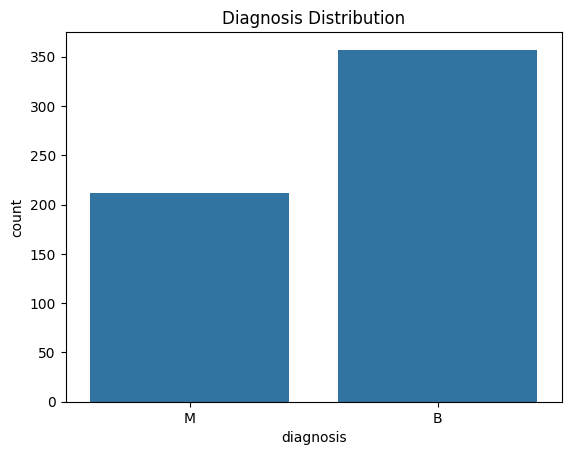

In [4]:
# Inspect target distribution
print("Target variable distribution:")
print(df['diagnosis'].value_counts())
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.show()

In [5]:
# Map target to binary for correlation and ML: M=1, B=0
df['diagnosis_binary'] = df['diagnosis'].map({'M':1, 'B':0})

In [6]:
# Basic statistics for numerical features
print("\nBasic statistics for numerical features:")
print(df.describe().T[['mean','50%','std']].rename(columns={'50%':'median'}))


Basic statistics for numerical features:
                               mean      median         std
radius_mean               14.127292   13.370000    3.524049
texture_mean              19.289649   18.840000    4.301036
perimeter_mean            91.969033   86.240000   24.298981
area_mean                654.889104  551.100000  351.914129
smoothness_mean            0.096360    0.095870    0.014064
compactness_mean           0.104341    0.092630    0.052813
concavity_mean             0.088799    0.061540    0.079720
concave points_mean        0.048919    0.033500    0.038803
symmetry_mean              0.181162    0.179200    0.027414
fractal_dimension_mean     0.062798    0.061540    0.007060
radius_se                  0.405172    0.324200    0.277313
texture_se                 1.216853    1.108000    0.551648
perimeter_se               2.866059    2.287000    2.021855
area_se                   40.337079   24.530000   45.491006
smoothness_se              0.007041    0.006380    0.00300

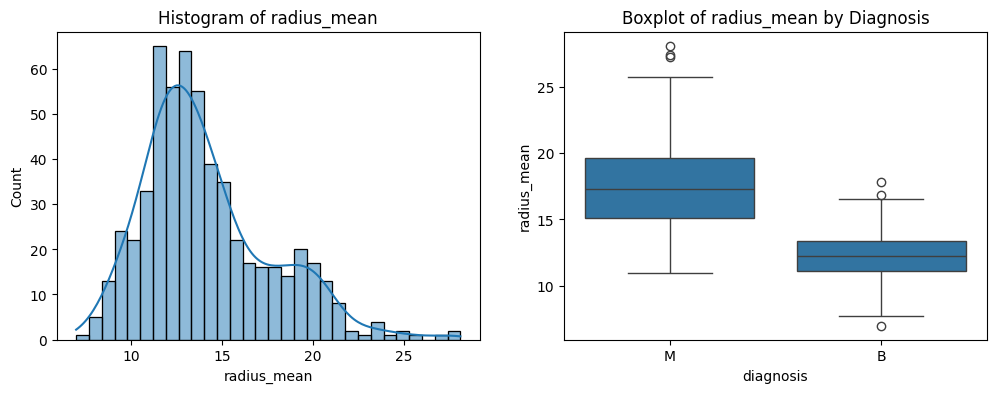

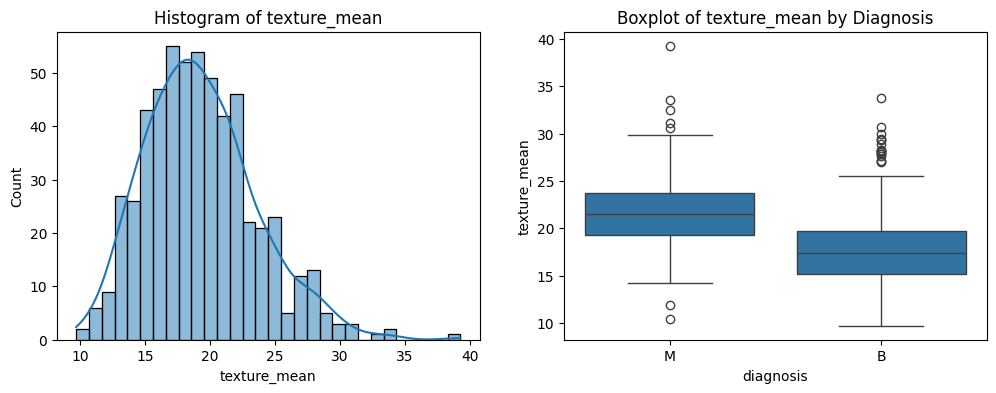

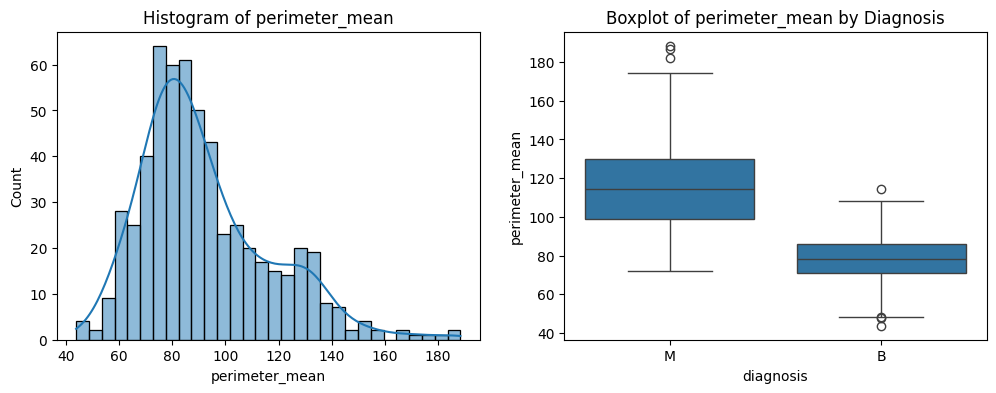

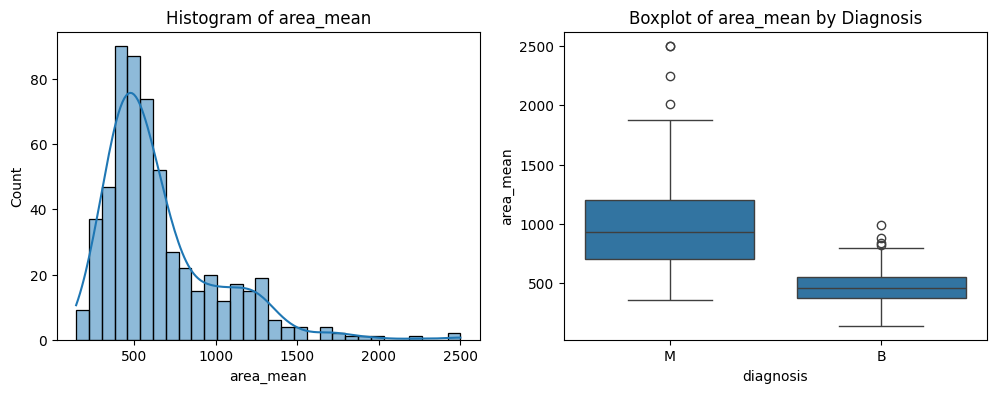

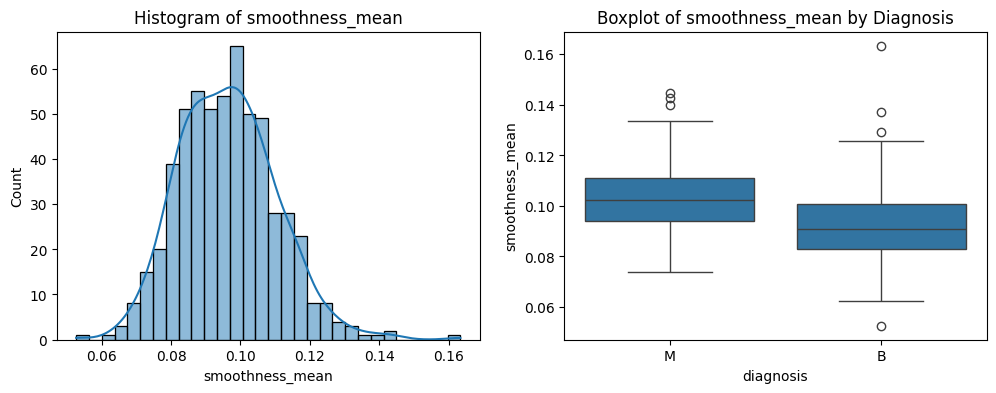

In [7]:
# Visualizations for numerical features: histograms and boxplots for a few features
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

for feature in features_to_plot:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')

    plt.subplot(1,2,2)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Diagnosis')

    plt.show()

In [9]:
# Correlation with target
corr = df.select_dtypes(include=[np.number]).corr()['diagnosis_binary'].sort_values(ascending=False)
print("\nCorrelation of features with diagnosis (binary):")
print(corr.head(10))


Correlation of features with diagnosis (binary):
diagnosis_binary        1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis_binary, dtype: float64


In [10]:
# Identify strong correlations (absolute > 0.7)
strong_corr = corr[abs(corr) > 0.7]
print("\nStrongly correlated features with diagnosis (|corr|>0.7):")
print(strong_corr)


Strongly correlated features with diagnosis (|corr|>0.7):
diagnosis_binary        1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
Name: diagnosis_binary, dtype: float64


Task 2: Data Preparation

In [11]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_binary           0
dtype: int64


No missing values found, so no imputation needed.

In [12]:
# Separate features and target
X = df.drop(columns=['diagnosis', 'diagnosis_binary'])
y = df['diagnosis_binary']

In [13]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Task 3: Model Training

In [14]:
# Split data into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 455, Testing samples: 114


In [15]:
# Define models with default hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [16]:
# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained with default hyperparameters.")

Logistic Regression trained with default hyperparameters.
Support Vector Machine trained with default hyperparameters.
Decision Tree trained with default hyperparameters.
Random Forest trained with default hyperparameters.
K-Nearest Neighbors trained with default hyperparameters.


Task 4: Model Evaluation and Visualization


Logistic Regression Evaluation:
Accuracy:  0.9649
Precision: 0.9750
Recall:    0.9286
F1-Score:  0.9512
AUC:       0.9960


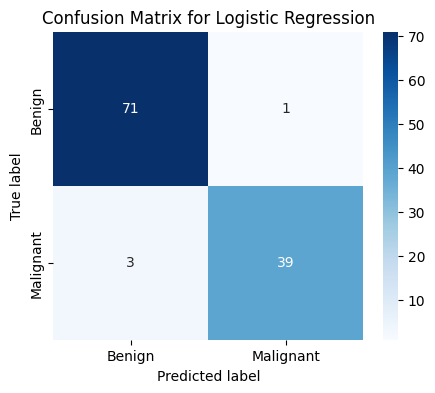

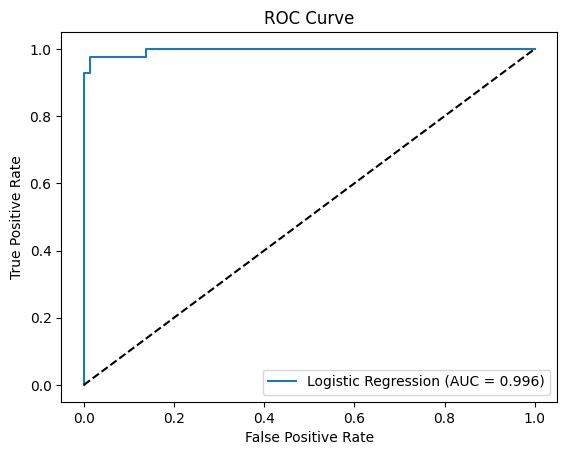


Support Vector Machine Evaluation:
Accuracy:  0.9737
Precision: 1.0000
Recall:    0.9286
F1-Score:  0.9630
AUC:       0.9954


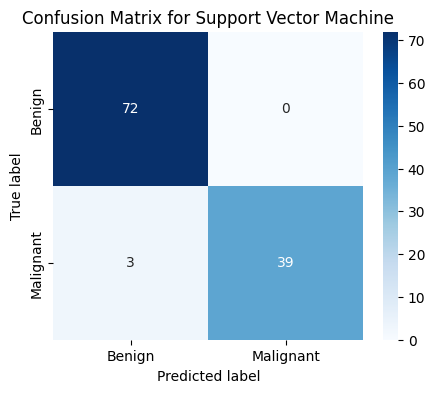

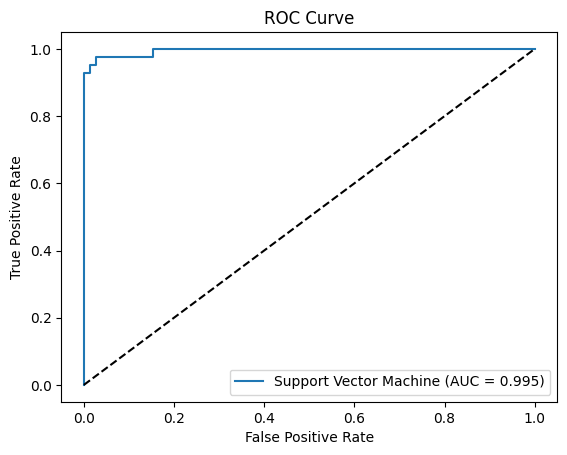


Decision Tree Evaluation:
Accuracy:  0.9298
Precision: 0.9048
Recall:    0.9048
F1-Score:  0.9048
AUC:       0.9246


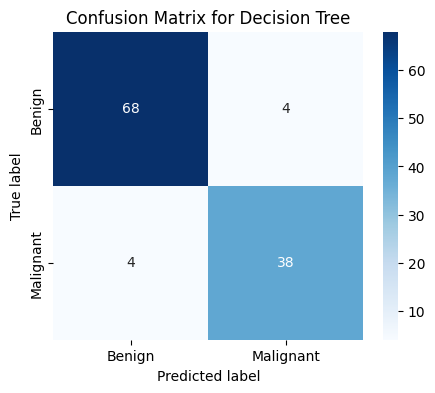

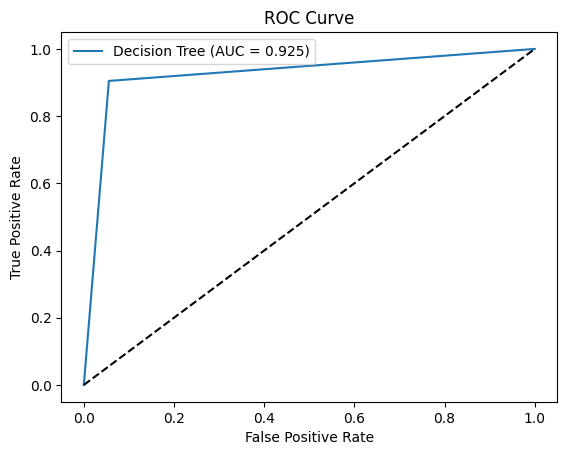


Random Forest Evaluation:
Accuracy:  0.9737
Precision: 1.0000
Recall:    0.9286
F1-Score:  0.9630
AUC:       0.9929


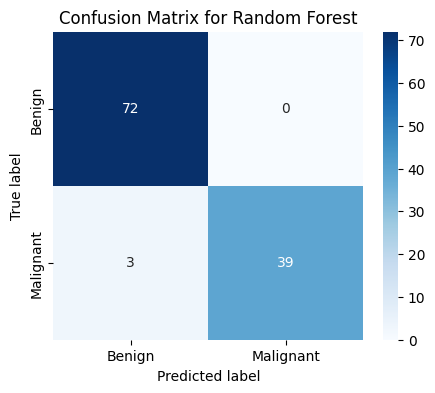

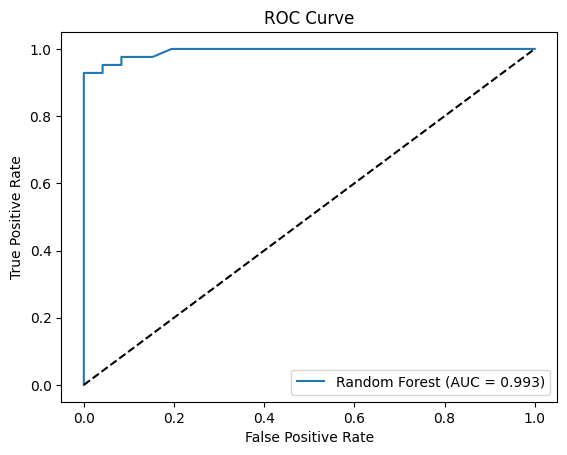


K-Nearest Neighbors Evaluation:
Accuracy:  0.9561
Precision: 0.9744
Recall:    0.9048
F1-Score:  0.9383
AUC:       0.9816


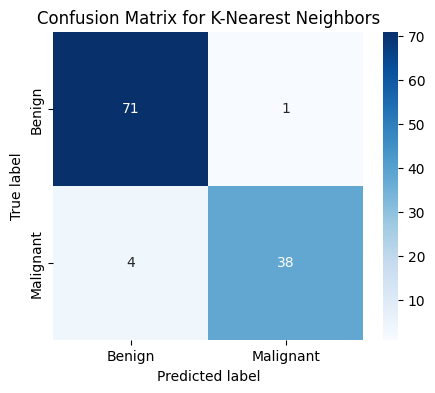

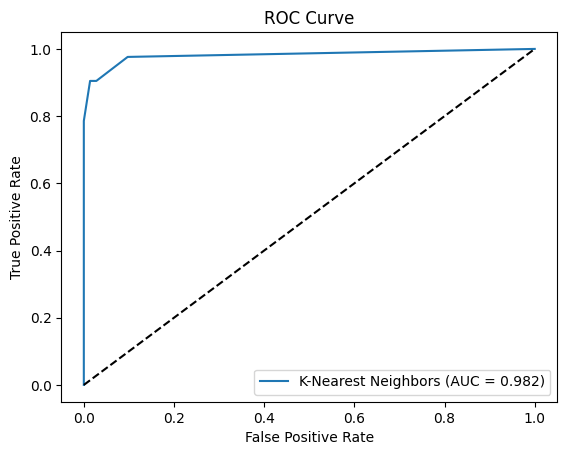

In [17]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"\n{name} Evaluation:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    if auc is not None:
        print(f"AUC:       {auc:.4f}")

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # ROC curve plot
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'auc': auc}

results = {}
for name, model in models.items():
    results[name] = evaluate_model(name, model, X_test, y_test)

In [18]:
# Find the best model based on F1-score and AUC
sorted_results = sorted(results.items(), key=lambda x: (x[1]['f1'], x[1]['auc'] or 0), reverse=True)
best_model_name = sorted_results[0][0]
print(f"\nBest model before tuning: {best_model_name}")


Best model before tuning: Support Vector Machine


Hyperparameter Tuning

In [20]:
# For simplicity, tune only the best model (example: Random Forest or whichever is best)
if best_model_name == 'Random Forest':
    model_to_tune = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
elif best_model_name == 'Support Vector Machine':
    model_to_tune = SVC(probability=True, random_state=42)
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
elif best_model_name == 'Logistic Regression':
    model_to_tune = LogisticRegression(max_iter=1000, random_state=42)
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    }
elif best_model_name == 'Decision Tree':
    model_to_tune = DecisionTreeClassifier(random_state=42)
    param_grid = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'K-Nearest Neighbors':
    model_to_tune = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': [3,5,7,9],
        'weights': ['uniform', 'distance']
    }

print(f"\nStarting hyperparameter tuning for {best_model_name}...")

grid_search = GridSearchCV(
    model_to_tune,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"Best parameters for {best_model_name}: {grid_search.best_params_}")


Starting hyperparameter tuning for Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}



Support Vector Machine (Tuned) Evaluation:
Accuracy:  0.9737
Precision: 1.0000
Recall:    0.9286
F1-Score:  0.9630
AUC:       0.9927


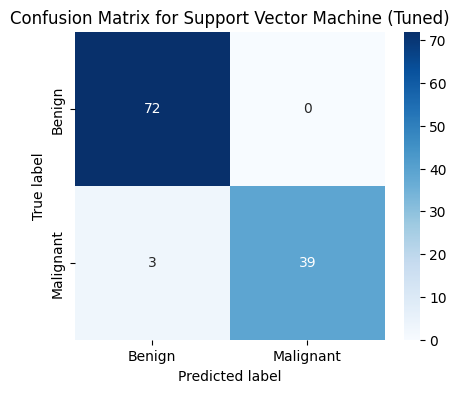

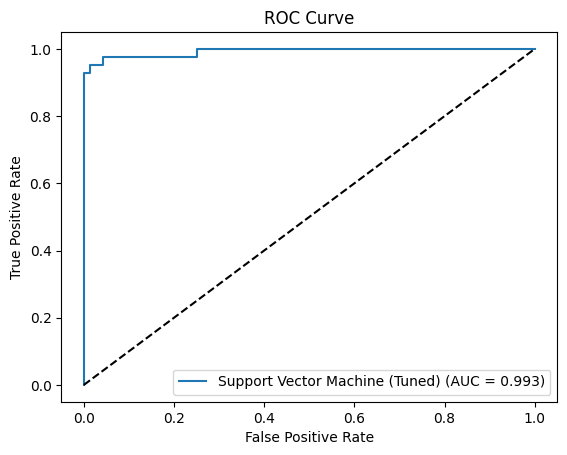

In [21]:
# Evaluate tuned model
best_tuned_model = grid_search.best_estimator_
tuned_results = evaluate_model(f"{best_model_name} (Tuned)", best_tuned_model, X_test, y_test)

In [22]:
# Compare before vs after tuning
print("\nComparison before and after tuning:")
print(f"F1 before tuning: {results[best_model_name]['f1']:.4f}")
print(f"F1 after tuning:  {tuned_results['f1']:.4f}")


Comparison before and after tuning:
F1 before tuning: 0.9630
F1 after tuning:  0.9630
